In [2]:
from typing import TypedDict,Dict
from langgraph.graph import StateGraph

In [5]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str



In [9]:
def first_node(state:AgentState) -> AgentState:
    """This is the first mode of our sequence"""

    state["final"] = f"Hi {state['name']} "

    return state

def second_node(state:AgentState) -> AgentState:
    """This is the second mode of our sequence"""

    state["final"] = state["final"] + f" you are {state['age']} years old"

    return state



In [12]:
graph = StateGraph(AgentState)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node","second_node")
graph.set_finish_point("second_node")   
app = graph.compile()
            

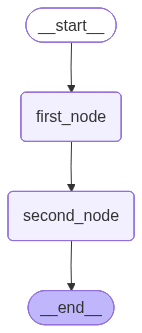

In [14]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
result = app.invoke({"name":"Sajal","age":"21"})
print(result)

{'name': 'Sajal', 'age': '21', 'final': 'Hi Sajal  you are 21 years old'}
